In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Load the dataset

In [3]:
df = pd.read_csv(r"C:\Users\pc\Downloads\train.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data)

df_clean = df.copy()

# Fill missing values properly
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64


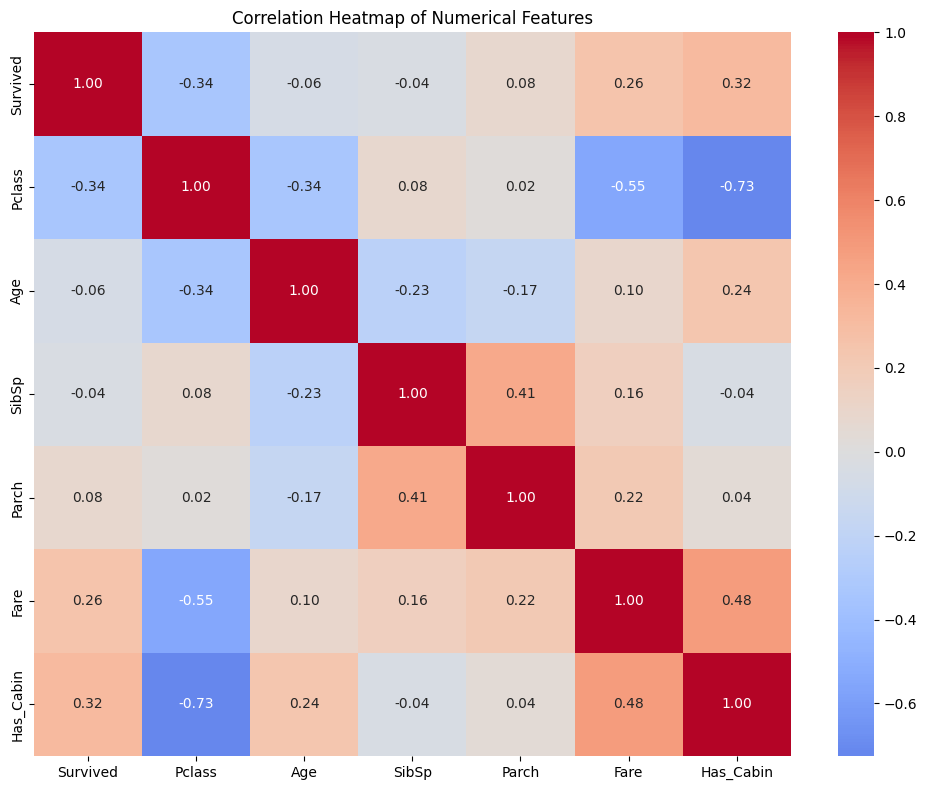

In [9]:
# Select numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_3696\3649160507.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['No Cabin', 'Has Cabin'])


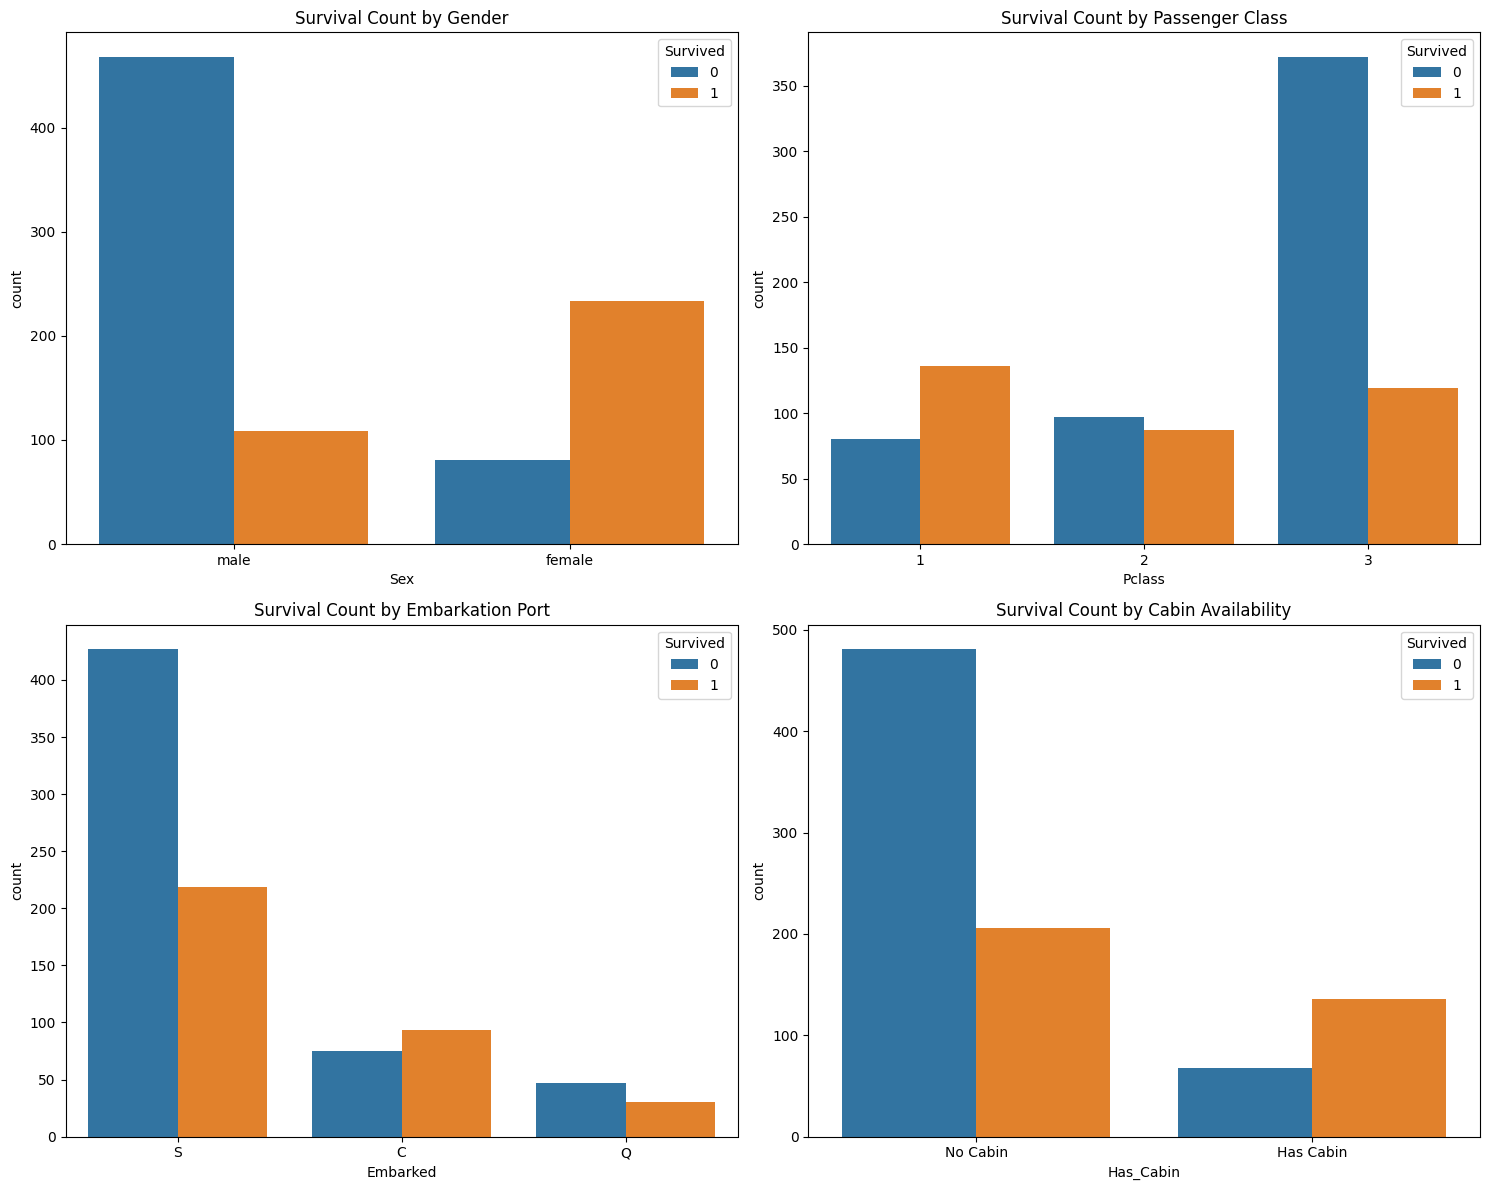

In [10]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Survival by Gender
sns.countplot(data=df_clean, x='Sex', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival Count by Gender')

# Survival by Passenger Class
sns.countplot(data=df_clean, x='Pclass', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival Count by Passenger Class')

# Survival by Embarkation Port
sns.countplot(data=df_clean, x='Embarked', hue='Survived', ax=axes[1,0])
axes[1,0].set_title('Survival Count by Embarkation Port')

# Survival by Cabin Availability
sns.countplot(data=df_clean, x='Has_Cabin', hue='Survived', ax=axes[1,1])
axes[1,1].set_title('Survival Count by Cabin Availability')
axes[1,1].set_xticklabels(['No Cabin', 'Has Cabin'])

plt.tight_layout()
plt.show()

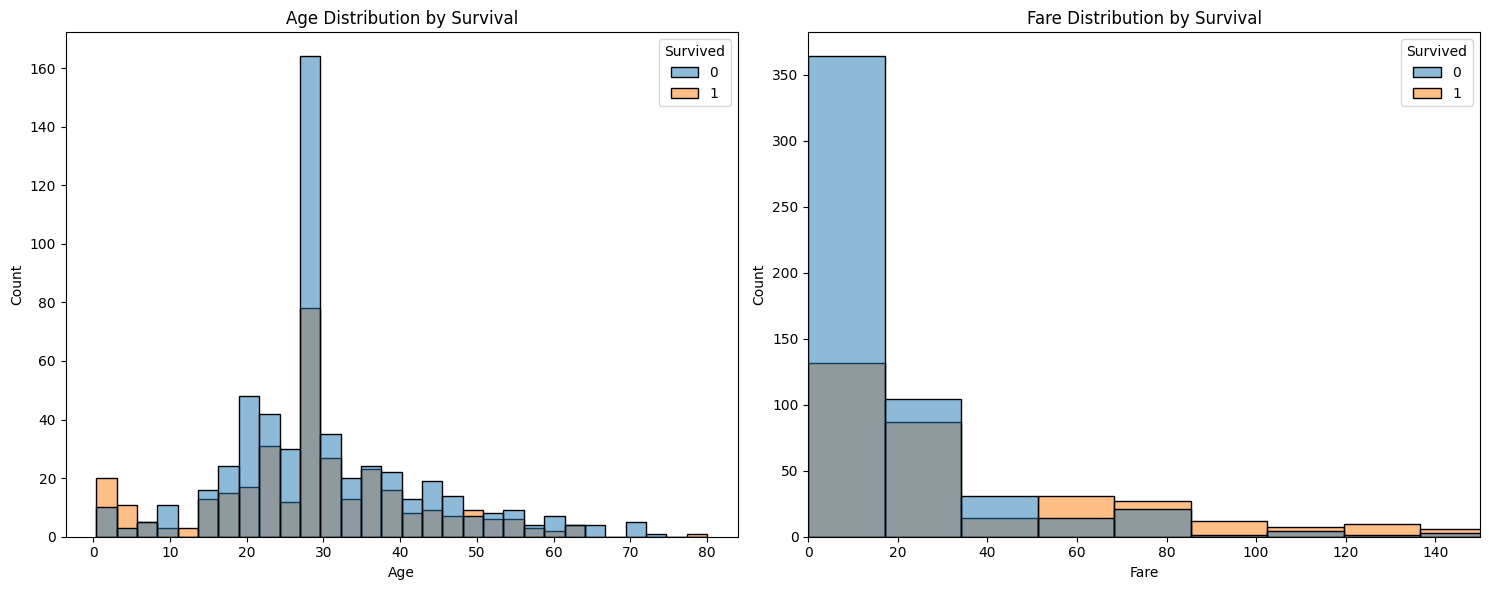

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age distribution by survival
sns.histplot(data=df_clean, x='Age', hue='Survived', multiple='layer', bins=30, ax=axes[0])
axes[0].set_title('Age Distribution by Survival')

# Fare distribution by survival (using log scale for better visualization)
sns.histplot(data=df_clean, x='Fare', hue='Survived', multiple='layer', bins=30, ax=axes[1])
axes[1].set_title('Fare Distribution by Survival')
axes[1].set_xlim(0, 150)  # Limit to see majority of data

plt.tight_layout()
plt.show()

advanced relationship

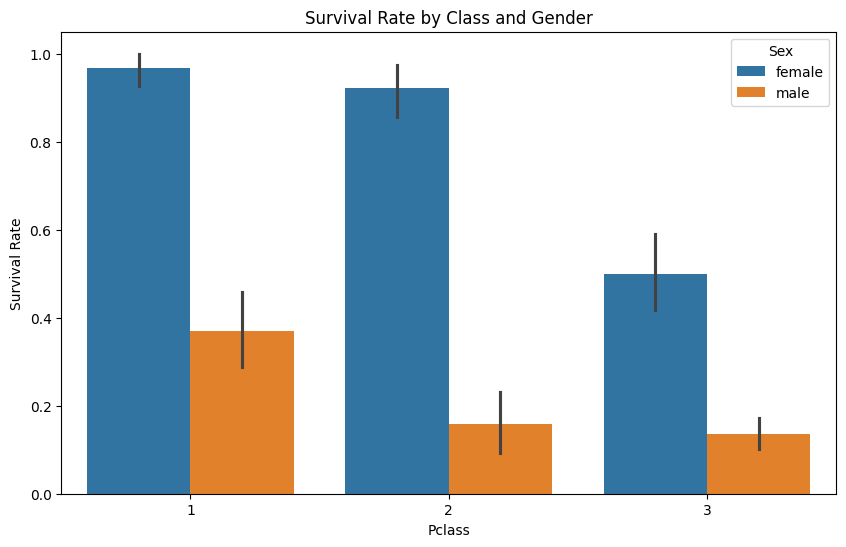

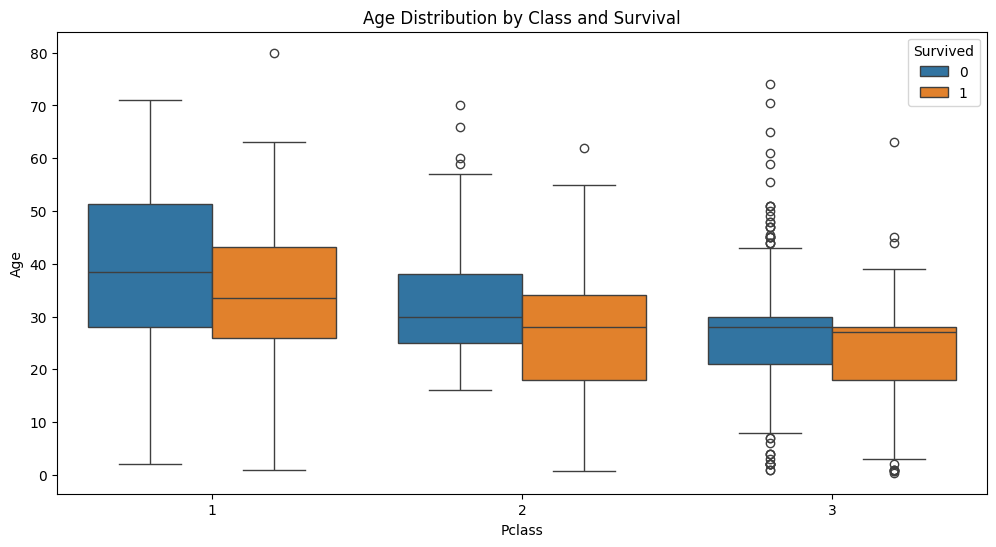

In [12]:
# Survival rate by class and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

# Age distribution by class and survival
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Pclass', y='Age', hue='Survived')
plt.title('Age Distribution by Class and Survival')
plt.show()

summary

SyntaxError: unterminated string literal (detected at line 1) (4032534604.py, line 1)